In [85]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [86]:
import sys
from pathlib import Path

sys.path.append(str(Path.cwd().parent))

In [87]:
import pandas as pd
import numpy as np
from statsmodels.graphics import tsaplots
from statsmodels.stats import diagnostic
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import scipy

from load_dataset import Dataset
import plotting

In [88]:
dataset = Dataset('../data/dataset/')

In [89]:
# Возьмем временной ряд.

In [90]:
ts = dataset['international-airline-passengers.csv']

/Users/g.sinyakov/ts_winter/load_dataset.py:34: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  ts = pd.read_csv(


In [91]:
# нарисуем. Видим ярко выраженную сезонность (мб не одну?), гетероскедастичность и тренд.

<AxesSubplot:xlabel='1949-01'>

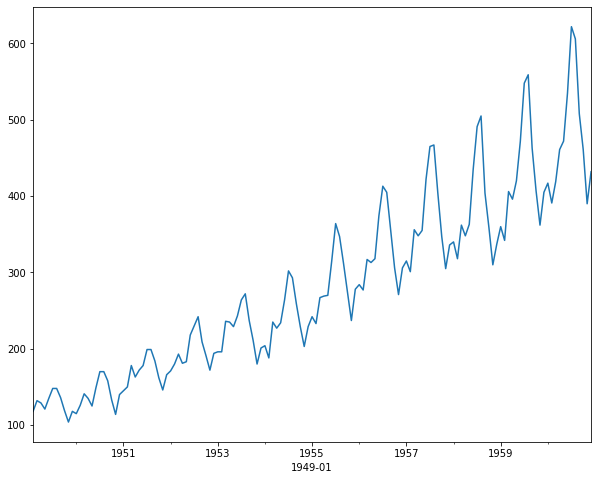

In [92]:
ts.plot(figsize=(10, 8))

In [93]:
# Посммотрим график автокорреляций - видим тренд и сильную цикличную автокореляцию

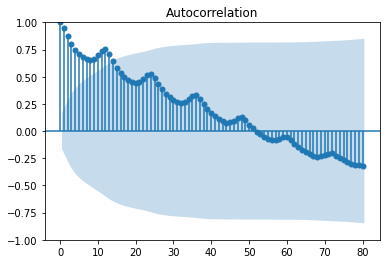

In [94]:
tsaplots.plot_acf(ts, lags=80);

In [95]:
# проверим автокорреляция при помощи теса Ланга-Бокса

In [96]:
res = diagnostic.acorr_ljungbox(ts)

In [97]:
p_value = res['lb_pvalue']

In [98]:
# видим, что значения p-value сильно ниже порога (обычно 0.05, 0.01), значит мы смело отвергаем нулевую гипотезу
# то есть данные явно не случайны
max(p_value), min(p_value)

(2.2652961479646928e-30, 1.4807047715344168e-175)

In [99]:
# проверим ряд на стационарость критерием Дики-Фуллера
# видим, что p-value сильно выше порога, значит мы никак не можем отвергнуть нулевую гипотезу, следовательно -
# ряд не стационарен
p_value = adfuller(ts)[1]
p_value

0.9915115096288659

In [100]:
# Попробуем сделать его стационарным
# Для начала постараемся избавиться от гетероскедастичности, взяв логарифм
ts_log = np.log(ts)

<AxesSubplot:xlabel='1949-01'>

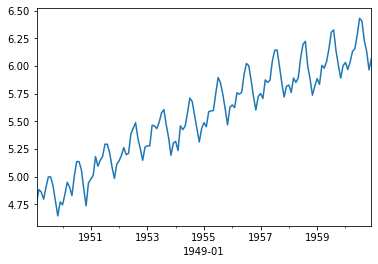

In [101]:
ts_log.plot()
# отлично, на вид, гетероскедастичность ушла

In [102]:
# впрочем, наши статистические тесты остались этим неудовлетворены и снова показывают крайнюю нестационарность
# скоррелированность
res = diagnostic.acorr_ljungbox(ts_log)
p_value = res['lb_pvalue']
print(min(p_value), max(p_value))
print(adfuller(ts)[1])

4.552029430392305e-201 9.436327894354704e-31
0.9915115096288659


In [103]:
# чтож, попробуем применить дифференцирование
ts_diff = ts_log.diff()

In [104]:
plotting.plot_ts(ts_log, ts_diff)

Loading BokehJS ...

In [106]:
res = diagnostic.acorr_ljungbox(ts_diff.dropna(), lags=70)
p_value = res['lb_pvalue']

print(min(p_value), max(p_value))
print(adfuller(ts_diff.dropna())[1])

4.0377134029604414e-107 0.02104816426436633
0.048033972528752085


<AxesSubplot:xlabel='1949-01'>

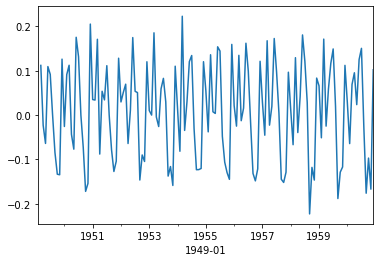

In [108]:
ts_diff.plot()

In [110]:
# кхмм, опять не помогает, давайте посмотрим на график автокорреляций и увидим, что период сезонности 
# приходится на 12 лаг, попробуем сезонное дифференцирование

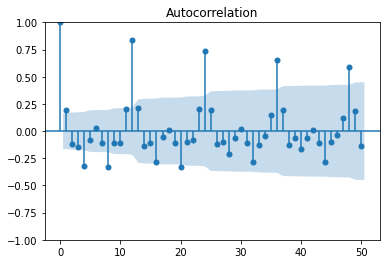

In [112]:
tsaplots.plot_acf(ts_diff.dropna(), lags=50);

In [113]:
ts_season_diff = ts_diff.diff(12)

In [116]:
res = diagnostic.acorr_ljungbox(ts_season_diff.dropna(), lags=45)

p_value = res['lb_pvalue']
print(min(p_value), max(p_value))
print(adfuller(ts_season_diff.dropna())[1])

6.188062493682463e-07 0.0025904863525081454
0.00016009049261960388


<AxesSubplot:xlabel='1949-01'>

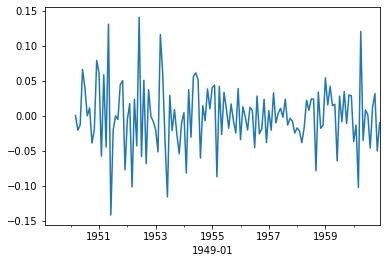

In [43]:
ts_season_diff.plot()

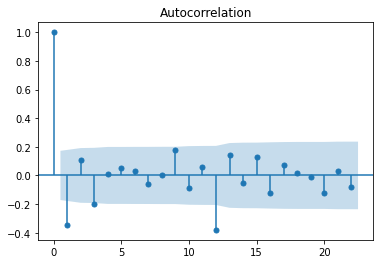

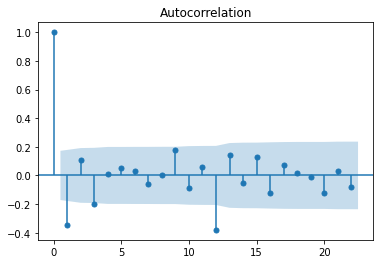

In [44]:
tsaplots.plot_acf(ts_season_diff.dropna())

In [117]:
# Бонус - пример простого обратно трансформирования ряда. По сути, к ряду просто применяются обратные операторы.
# exp для log, кумулятивная сумма для дифференцирования

In [118]:
ts = dataset['hour_3553.csv']

/Users/g.sinyakov/ts_winter/load_dataset.py:34: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  ts = pd.read_csv(


<AxesSubplot:xlabel='2019-05-19T03:00:00'>

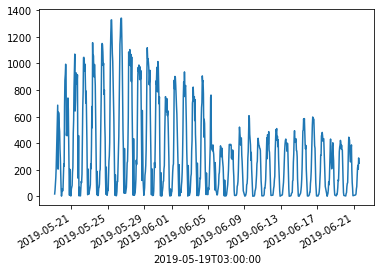

In [119]:
ts.plot()

In [120]:
transformed = np.log(ts).diff()

<AxesSubplot:xlabel='2019-05-19T03:00:00'>

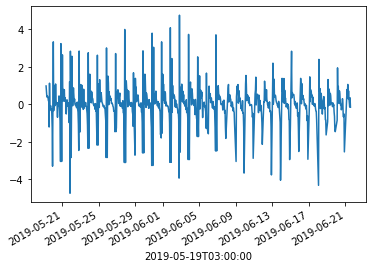

In [121]:
transformed.plot()

In [122]:
back_transformed = np.exp(transformed.cumsum())

<AxesSubplot:xlabel='2019-05-19T03:00:00'>

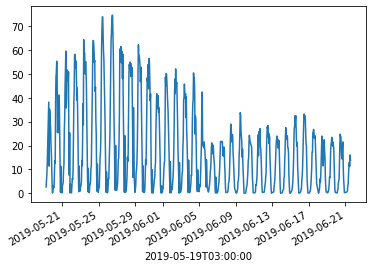

In [123]:
back_transformed.plot()

## Задание:
    1. Выбрать ряд stl_example.csv.
    2. Используя вышеперечисленные преобразования, добиться стационарности ряда.
    3. Критерием стационарности будет служить значение p-value теста Дики-Фуллера, меньшее 0.05 и соответствующий график.

In [124]:
ts = dataset['stl_example.csv']

/Users/g.sinyakov/ts_winter/load_dataset.py:34: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  ts = pd.read_csv(


<AxesSubplot:>

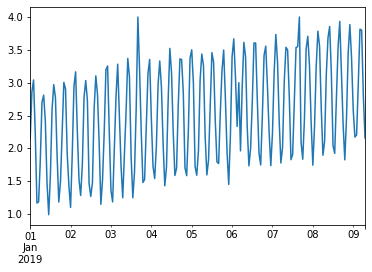

In [125]:
ts.plot()

In [126]:
ts_diff_1 = ts.diff()

<AxesSubplot:>

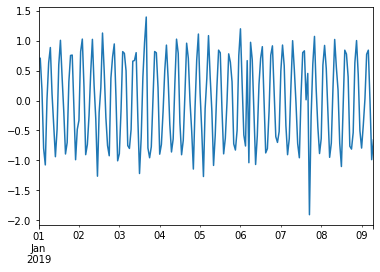

In [127]:
ts_diff_1.plot()

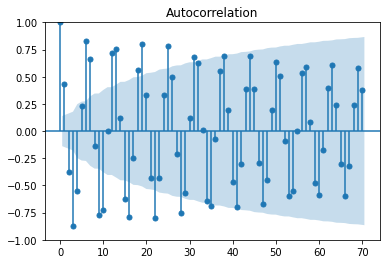

In [134]:
tsaplots.plot_acf(ts_diff_1.dropna(), lags=70);

In [130]:
ts_diff_6 = ts_diff_1.diff(6)

<AxesSubplot:>

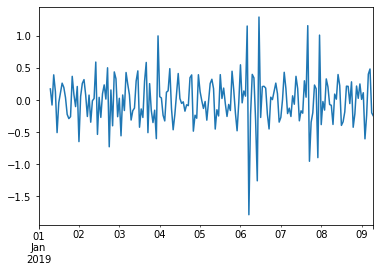

In [137]:
ts_diff_6.plot()

In [138]:
ts_diff_66 = ts_diff_6.diff(6).dropna()

<AxesSubplot:>

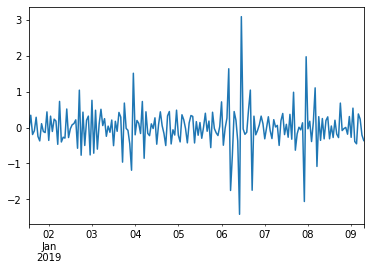

In [139]:
ts_diff_66.plot()

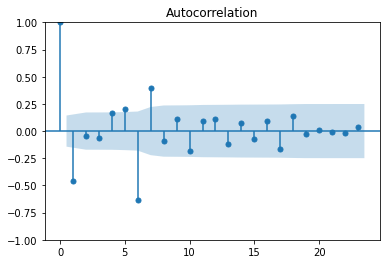

In [141]:
tsaplots.plot_acf(ts_diff_66);

In [144]:
res = adfuller(ts_diff_66)

In [146]:
res[1]

1.4544991074850726e-09

In [150]:
ts.diff().diff().diff()

2019-01-01 00:00:00         NaN
2019-01-01 01:00:00         NaN
2019-01-01 02:00:00         NaN
2019-01-01 03:00:00   -0.459066
2019-01-01 04:00:00    0.705417
                         ...   
2019-01-09 03:00:00    0.294496
2019-01-09 04:00:00   -0.671363
2019-01-09 05:00:00   -0.921499
2019-01-09 06:00:00   -0.120601
2019-01-09 07:00:00    1.303093
Name: 0, Length: 200, dtype: float64